<a href="https://colab.research.google.com/github/ksm999/QuantumComputing/blob/main/QIP_FRQI_%26_NEQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Image Processing (QIP)

### Package Install

## Flexible Representation of Quantum Images (FRQI)

### Implementation and Measurement : 2*2 Image Greyscale Values

In [2]:
# Importing standard Qiskit libraries and configuring account
import qiskit
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

ModuleNotFoundError: No module named 'ipywidgets'

|𝐼(ϴ)> = 1/2^n Σ(cosϴ|0>+sinϴ|1>)⊗|i>

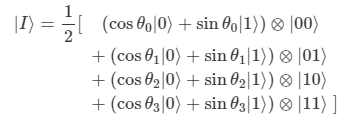

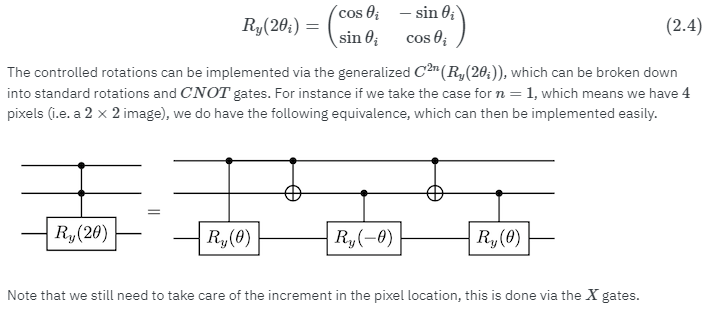

##### I'll prove that R_y(2𝜃) can be expressed like these gates.

In [9]:
import numpy as np
from math import pi
theta = pi/6

# Ry(2theta)
Ry_2 = np.array([[1,0,0,0,0,0,0,0],
                 [0,np.cos(theta),0,0,0,-np.sin(theta),0,0],
                 [0,0,1,0,0,0,0,0],
                 [0,0,0,np.cos(theta),0,0,0,-np.sin(theta)],
                 [0,0,0,0,1,0,0,0],
                 [0,np.sin(theta),0,0,0,np.cos(theta),0,0],
                 [0,0,0,0,0,0,1,0],
                 [0,0,0,np.sin(theta),0,0,0,np.cos(theta)]])

#Ry12(-theta)
Ry_12theplus = np.array([[1,0,0,0,0,0,0,0],
                          [0,1,0,0,0,0,0,0],
                          [0,0,np.cos(theta/2),0,0,0,np.sin(theta/2),0],
                          [0,0,0,np.cos(theta/2),0,0,0,np.sin(theta/2)],
                          [0,0,0,0,1,0,0,0],
                          [0,0,0,0,0,1,0,0],
                          [0,0,np.sin(theta/2),0,0,0,np.cos(theta/2),0],
                          [0,0,0,np.sin(theta/2),0,0,0,np.cos(theta/2)]])
#Ry12(-theta)
Ry_12theminus = np.array([[1,0,0,0,0,0,0,0],
                          [0,1,0,0,0,0,0,0],
                          [0,0,np.cos(-theta/2),0,0,0,np.sin(-theta/2),0],
                          [0,0,0,np.cos(-theta/2),0,0,0,np.sin(-theta/2)],
                          [0,0,0,0,1,0,0,0],
                          [0,0,0,0,0,1,0,0],
                          [0,0,np.sin(-theta/2),0,0,0,np.cos(-theta/2),0],
                          [0,0,0,np.sin(-theta/2),0,0,0,np.cos(-theta/2)]])

#Ry02(theta)
Ry_02plus = np.array([[1,0,0,0,0,0,0,0],
                 [0,np.cos(theta/2),0,0,0,-np.sin(theta/2),0,0],
                 [0,0,1,0,0,0,0,0],
                 [0,0,0,np.cos(theta/2),0,0,0,-np.sin(theta/2)],
                 [0,0,0,0,1,0,0,0],
                 [0,np.sin(theta/2),0,0,0,np.cos(theta/2),0,0],
                 [0,0,0,0,0,0,1,0],
                 [0,0,0,np.sin(theta/2),0,0,0,np.cos(theta/2)]])


#CXGate

CX = np.array([[1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,1],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0]])
print(Ry_2)
print("-----------------------------------------------------------------------")
print(Ry_12theplus*CX*Ry_12theminus*CX*Ry_02plus)
print("-----------------------------------------------------------------------")
print(Ry_2 == Ry_12theplus*CX*Ry_12theminus*CX*Ry_02plus)

[[ 1.         0.         0.         0.         0.         0.
   0.         0.       ]
 [ 0.         0.8660254  0.         0.         0.        -0.5
   0.         0.       ]
 [ 0.         0.         1.         0.         0.         0.
   0.         0.       ]
 [ 0.         0.         0.         0.8660254  0.         0.
   0.        -0.5      ]
 [ 0.         0.         0.         0.         1.         0.
   0.         0.       ]
 [ 0.         0.5        0.         0.         0.         0.8660254
   0.         0.       ]
 [ 0.         0.         0.         0.         0.         0.
   1.         0.       ]
 [ 0.         0.         0.         0.5        0.         0.
   0.         0.8660254]]
-----------------------------------------------------------------------
[[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.96592583  0.          0.          0.         -0.
   0.          0.        ]
 [ 0.          0.          0.          0.    

#### Example 1. 𝛩_i = 0; ∀i - all pixels at minimum intensity

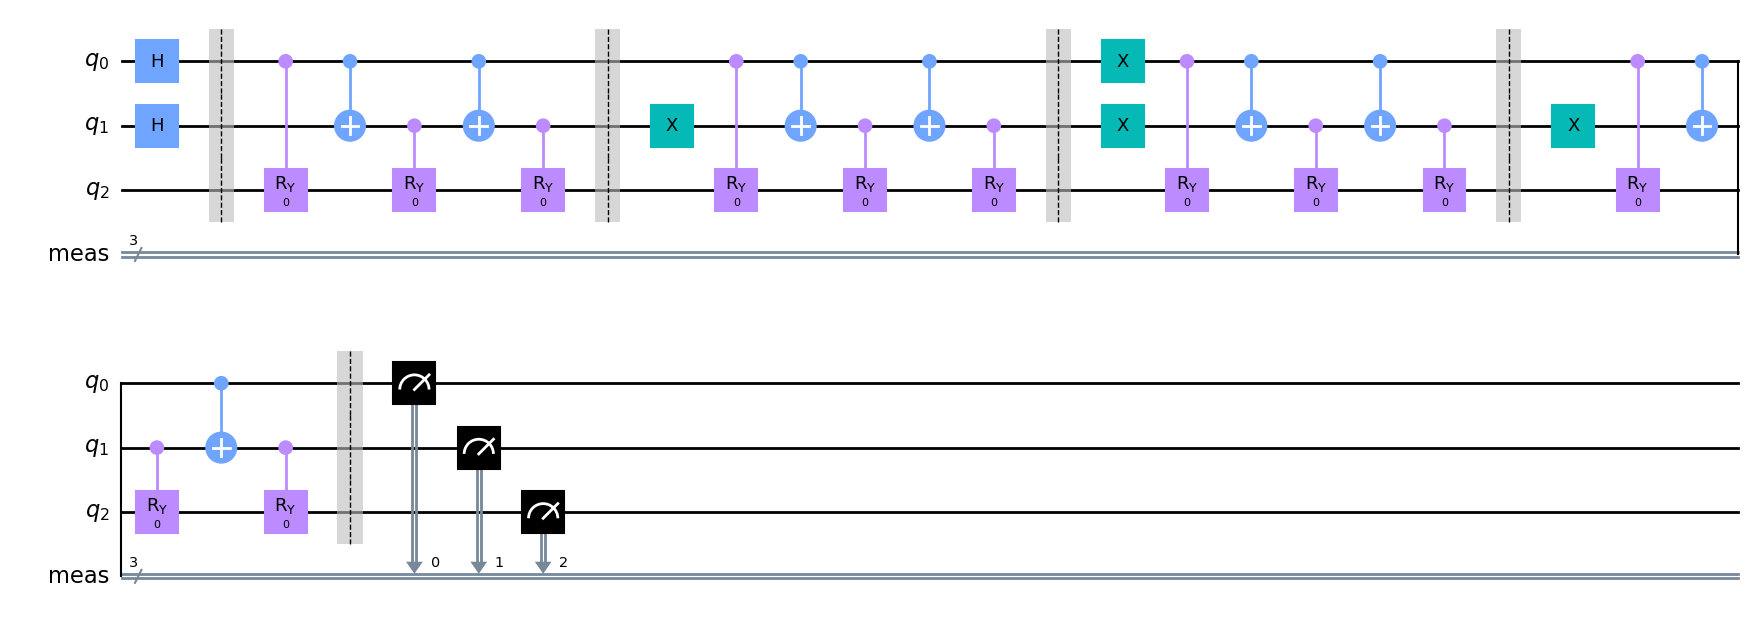

In [3]:
theta = 0 # all pixels are black
qc = QuantumCircuit(3)

qc.h(range(0,2))
qc.barrier()

# Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

# Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

# Pixel 3

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

# Pixel 4

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw('mpl')

#### Measurement and Image Retrieval

We can see that all the terms associated with the state |1> in the color encoding part of the FRQI state will vanish because of the value 𝛩 so we do expect to see only 4 equiprobable states.

In [4]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


{'000': 992, '001': 1036, '010': 1059, '011': 1009}


NameError: name 'plot_histogram' is not defined

#### Example 2. 𝜃_i = π/2;, ∀i - all pixels at maximum intensity

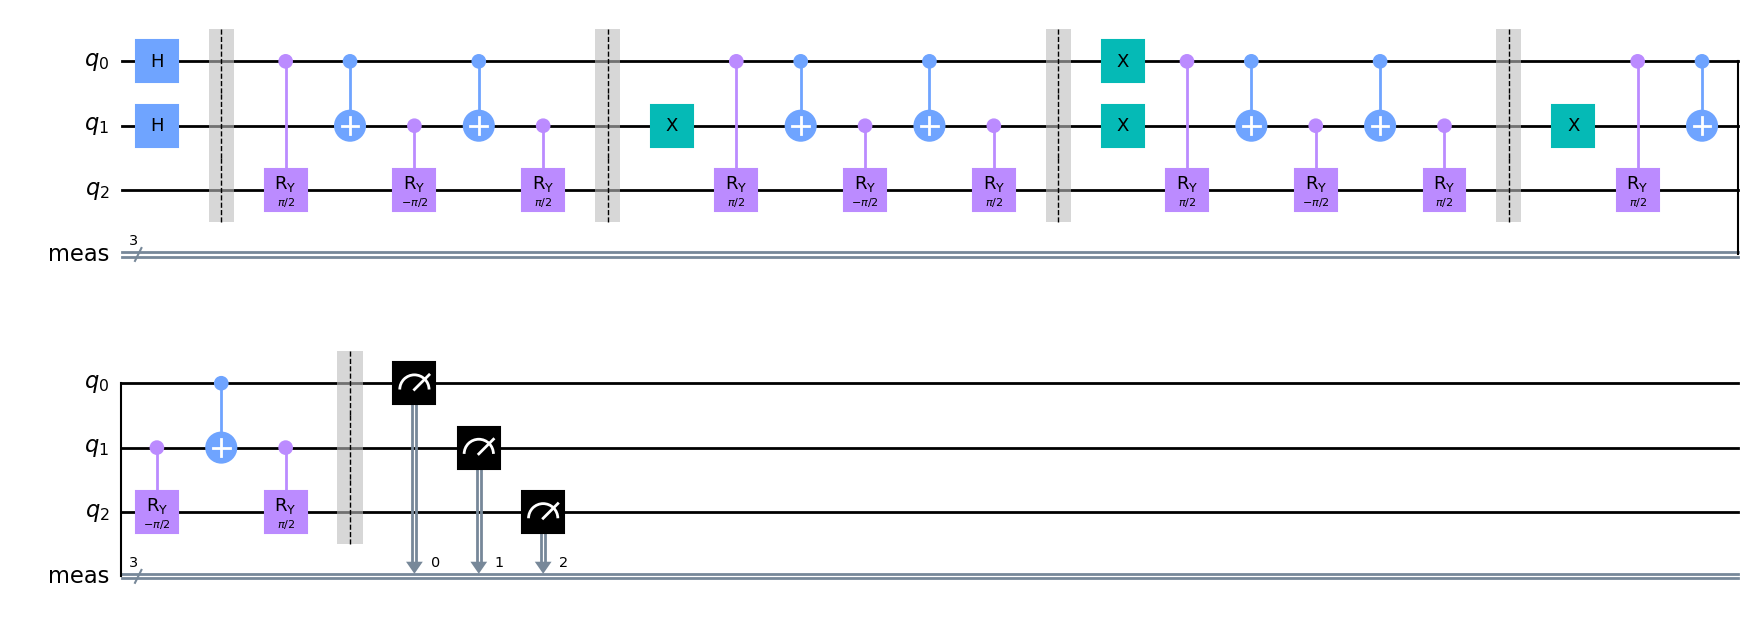

In [7]:
from math import pi

theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()

#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

#Pixel 3

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

#Pixel 4

qc1.x(1)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw('mpl')

#### Measurement and Image Retrieval

In this case we do expect to see the terms associated with the cos in the equation (1.3) to vanish, and get 4 equiprobable states with a "1" prefix.

{'111': 1007, '100': 1058, '101': 976, '110': 1055}


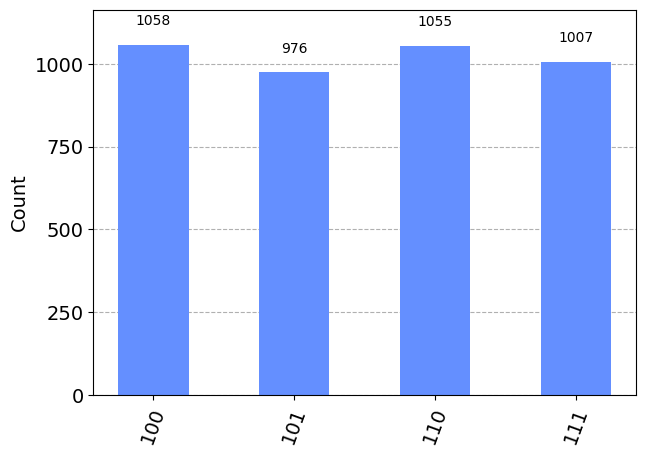

In [8]:
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')
job = execute(qc1, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

#### Example 3: 𝜃_i = π/4;,;∀i - all pixels at 50 intensity

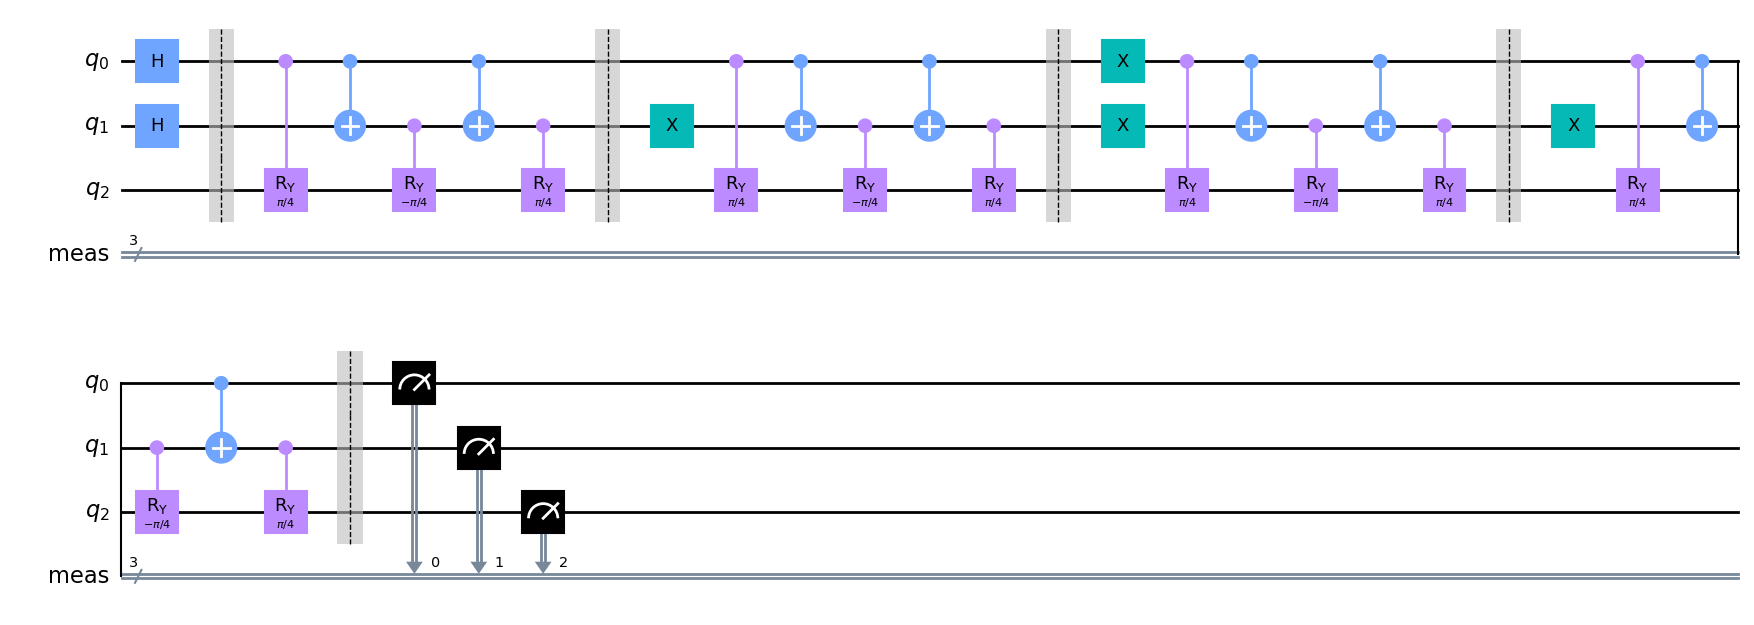

In [ ]:
theta = pi/4  # all pixels white
qc2 = QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()

# Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

# Pixel 2

qc2.x(1)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

# Pixel 3

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

# Pixel 4

qc2.x(1)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw('mpl')

#### Measurement and Image Retrieval
In this case we do expect to get all the 8 equiprobable states.

{'100': 484, '110': 537, '101': 486, '001': 529, '111': 541, '011': 522, '010': 492, '000': 505}


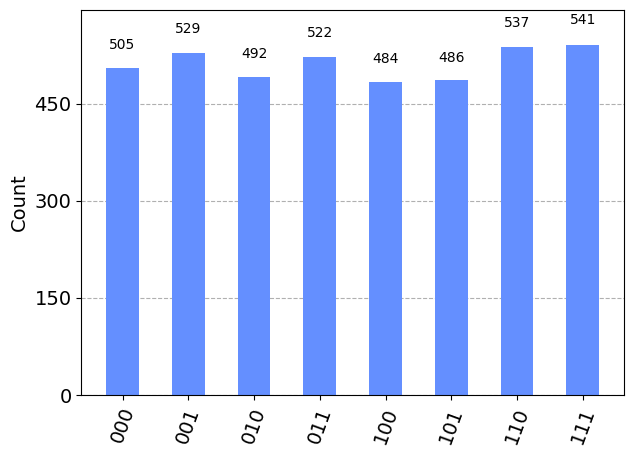

In [ ]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc2, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc2)
print(counts)
plot_histogram(counts)

#### Circuit Analysis and Running on a Real Device

As the only difference between the circuits is teh rotation angle 𝜃, we can check the depth, and number of gates needed for this class of circuits (i.e., 2*2 images)

#### Circuit Analysis
Let's use our circuit with 𝜃 = π/2;,;∀i as example (maximum intensity for all pixels.)

In [ ]:
print("Depth:", qc1.depth)
print("Operations:", qc1.count_ops())

Depth: <bound method QuantumCircuit.depth of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1bf52989a0>>
Operations: OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


This does not look too complex but if we want to see how this circuit can be unrolled by the transpiler, it gets a bit more complicated.

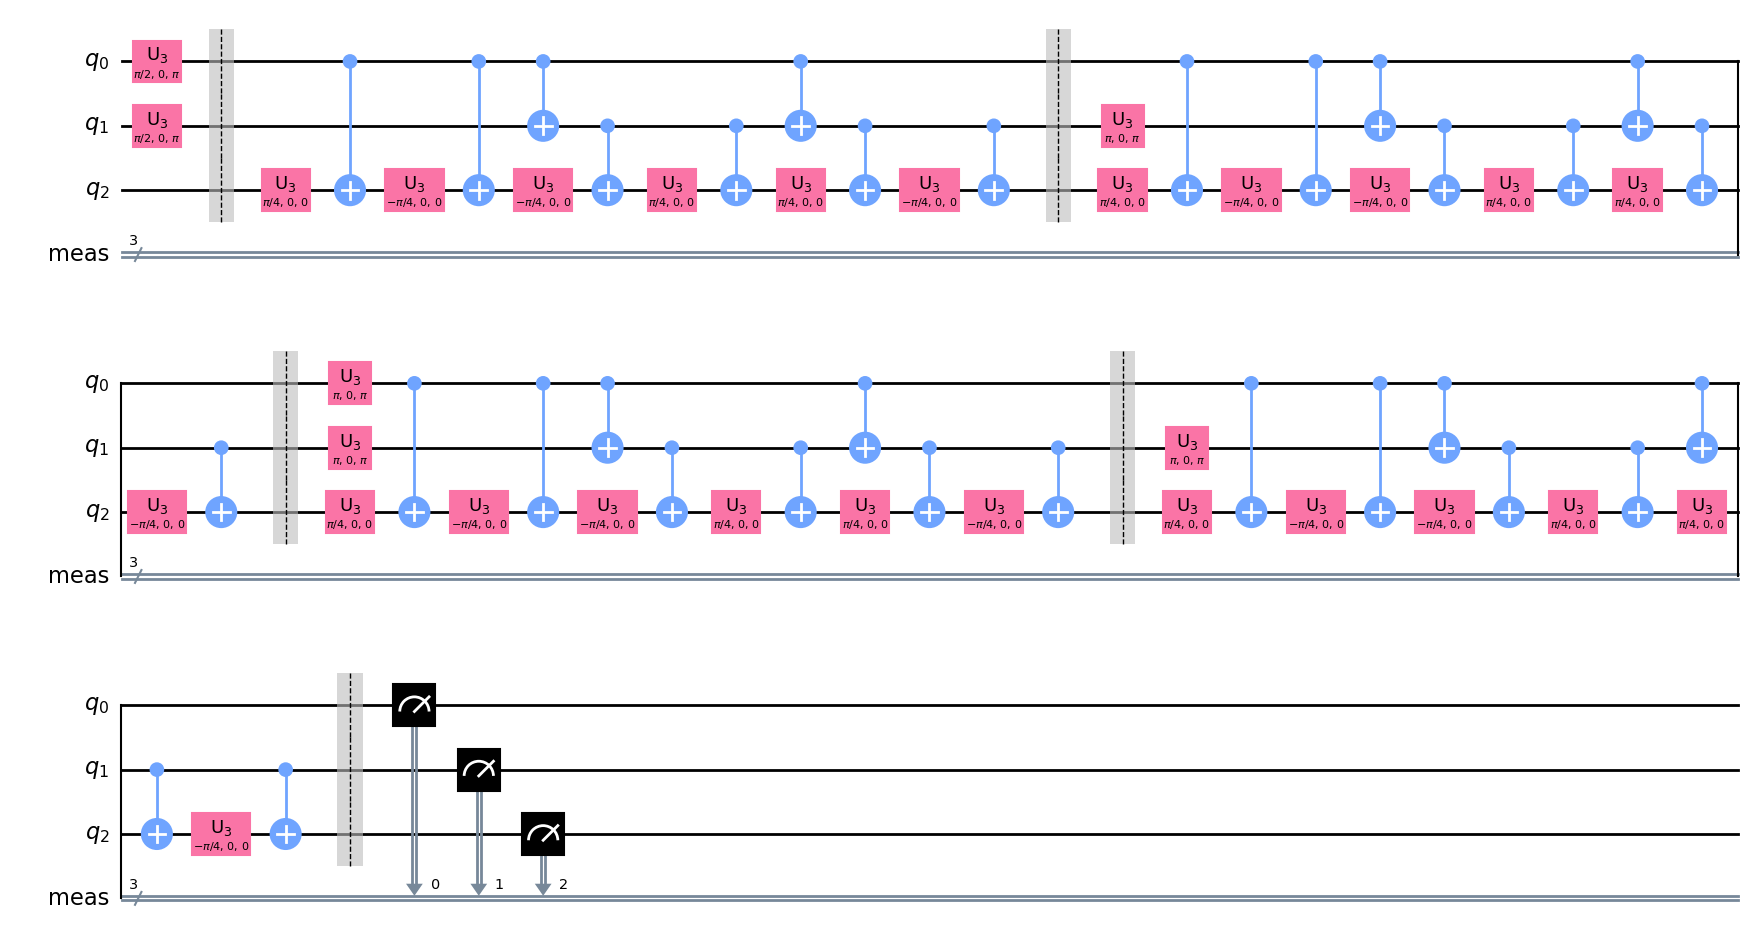

In [ ]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3','cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw('mpl')

In [ ]:
print("Depth:", new_circ.depth)
print("Operations:", new_circ.count_ops())

Depth: <bound method QuantumCircuit.depth of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1c04c87850>>
Operations: OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


The depth for example doubled in size.
We can get closer to what would actually be run on a real device by feeding the transpiler with a device coupling map (for instance, Athens).
We will also use optimization level 3.


In [ ]:
from qiskit.providers.fake_provider import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 59), ('sx', 55), ('cx', 51), ('barrier', 5), ('x', 4), ('measure', 3)])
depth =  147


#### Run on a Real Device
We are now ready to run on a real device. Here we will use a simulated (fake) Athens device, but you can run this on the real device too.


In [ ]:
# This code connects to, or relies on results from IBM Quantum,
# Add your API-token to your account to run this cell

from qiskit import assemble

t_qc1 = transpile(qc1, fake_athens, optimization_level=3)
qobj = assemble(t_qc1, shots=4096)
result = fake_athens.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)


QiskitError: ignored

As we can see the result are not really what we were expecting due to the noise of the device. The ideal simulated circuit is shown below for contrast.

{'100': 986, '101': 1082, '111': 1014, '110': 1014}


<ipython-input-17-bef5a74b5a07>:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


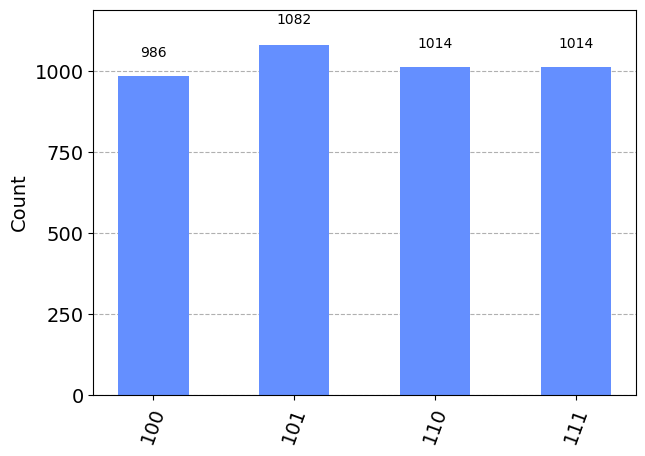

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

### Compression

As the images we would like to encode are growing in size and given the depth of the circuits we will have to run, it is quite obvious that whatever we can do in order to reduce the complexity of the circuit (depth and number of CNOT gates) will make a great difference.

Compression can be achieved by grouping pixels with the same intensity. What makes them distinct is the binary string used to encode the position, but they share the same angle for the associated controlled rotation. Let's consider for example the following image:

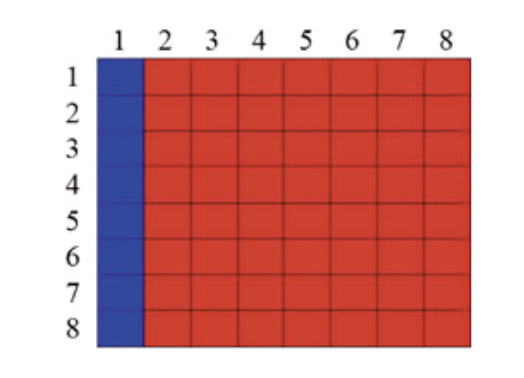

The blue pixels are at positions are
|0>,|8>,|16>,|24>,|32>,|40>,|48> and |56>.
Their respective binary representation and boolean expressions are:

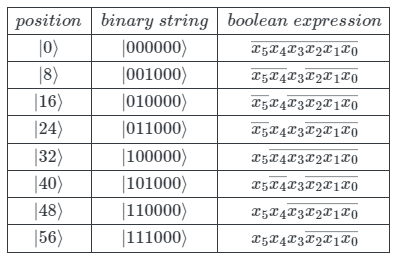

The boolean expression we would liek to simplify/minimize is then:


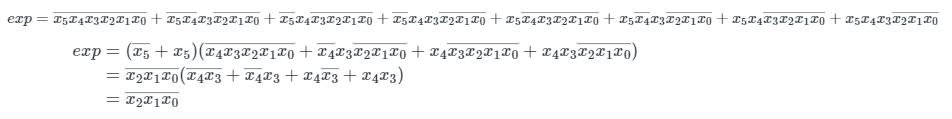

We can then not only group the pixels under one conditional rotation, but we also see that the conditions for the controlled gate also have been reduced, which will result in a reduction of single gates needed for implementation.

## Novel Enhanced Quantum Representation (NEQR) for Digital Images

The Novel Enhanced Quantum Representation (NEQR) is another one of the earlier forms of quantum image representation.

It's similar to its predecessor the Flexible Representation of Quantum Images (FRQI) in that it uses a normalized superposition to store pixels in an image. The limitation of FRQI is that it uses one qubit to store the grayscale information of the pixel, which prevents performing any complex image transformations.

NEQR was created to improve over FRQI by leveraging the basis state of a qubit sequence to store the image's grayscale value [5].

NEQR offers the following advantages over FRQI as demonstrated in [5]:

*   Quadratic speedup of the time complexity to prepare the NEQR quantum image

*  Optimal image compression ratio of up to 1.5*

*   Accurate image retrieval after measurement, as opposed to probabilistic as FRQI
*   Complex color and many other operations can be achieved

In this section we will represent a classical 2*2 grayscaled image in a quantum computer using the NEQR model.

### The NEQR Process

The NEQR process to represent an image is composed of two parts; preparation and compression and are described as follows.

#### How are images encoded today:

In order to represent an image on a quantum computer using the NEQR model, we'll first look at the various components required to do so and how they are related to each other. We'll begin with the color range of the image.

The color range of an image is represented by a bitstring as follows: Binary Image: 1 bit representing 0=black, and 1=white


Grayscale Image: 8 bits representing the various shades of gray intensity values between 0 (black) and 255 (white).


Color Image: 24 bits, are broken up into 3 groups of 8 bits, where each group of 8 bits represents the Red, Green, and Blue intensities of the pixel color.


In our example we will represent the pixels by their position in the image. Since we will be representing a two-dimensional image, we will define the position of the image by its row and column, Y, X, respectively.

Note In image processing the pixel positions are represented as they would on the X-Y plane, which is why the column numbers are represented by the value X, and the row numbers are represented by the value Y.

#### Image Compression:

When the quantum representation of the image is completed, we will check the depth and size of the circuit created and provide some classical options to compress the generated NEQR circuit.

Now, let's get started by encoding a 2*2 quantum image as follows.

### Encoding a 2*2 Image

In this example we will encode a 2*2 grayscale image where each pixel value will contain the following values.
In the table below we have the first column which represents the pixel position of the 2*2 image. The second column represents the intensity value at the specified pixel position. The third column is a description of the grayscale intensity (ex: 01100100 = 100).

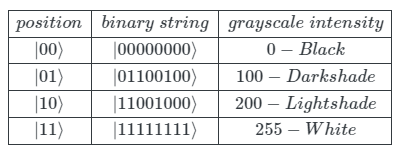

To encode these pixels we will need to define our quantum registers, the first register we will use to store the pixel position. Since this is a 2D image we will need two variables relates to the horizontal (column) and the other the vertical (row), Y and X respectively.

The color value of each pixel is denoted as f(Y,X), where Y and X specify the pixel position in the image by row and column, respectively.

The range of the grayscale intensity for each pixel can vary, however since the most common grayscale range is generally from 0 - 255, the values is usually denoted as 2^q, where for 256, we can confirm q=8. Where q represents the number of bits needed for the binary sequence of colors: C^0,C^1,C^2,...C^(q-2), C^(q-1).

This means that each pixel value can be represented as follows, where C is a binary representation of the grayscale intensity value:

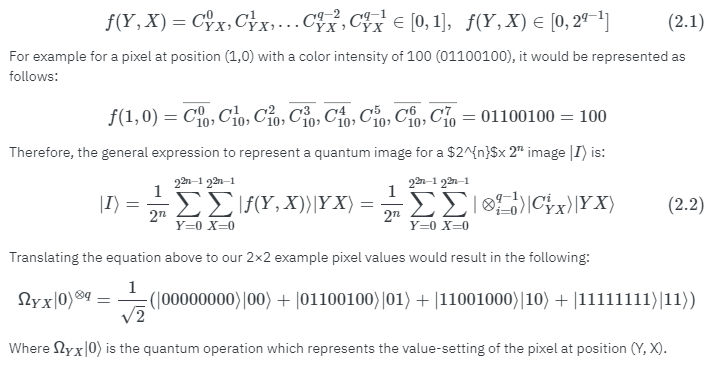

Our first quantum Circuit will include 2^n qubits used to represent the pixel value f(Y,X), where in this case will have 8 qubits.

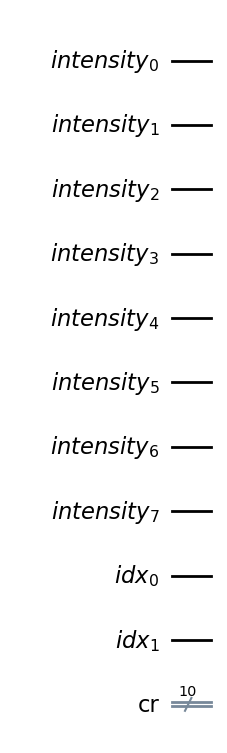

In [ ]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister

# Initialize the quantum circuit for the image
# Pixel position
idx = QuantumRegister(2, 'idx')
# grayscale pixel intensity value
intensity = QuantumRegister(8,'intensity')
# classical register
cr = ClassicalRegister(10, 'cr')

# create the quantum circuit for the image
qc_image = QuantumCircuit(intensity, idx, cr)

# set the total number of qubits
num_qubits = qc_image.num_qubits

qc_image.draw('mpl')

Next, we will add a Hadamard gate to the position qubits (idx) so we can take advantage of all positions in the 2×2 image. As an option we'll include Identity gates to the intensity qubits.

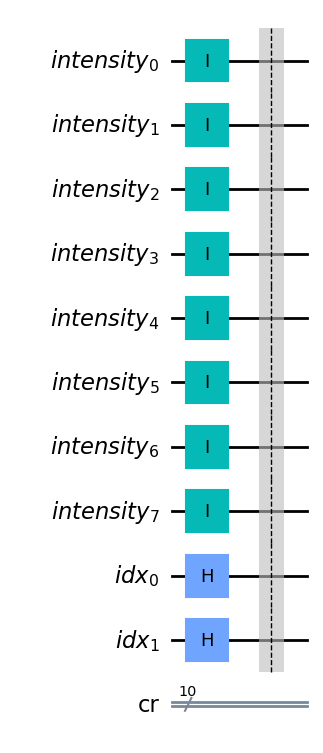

In [ ]:
# Initialize the quantum circuit

# Optional: Add Identity gates to the intensity values
for idx in range(intensity.size):
    qc_image.i(idx)

# Add Hadamard gates to the pixel positions
qc_image.h(8)
qc_image.h(9)

# Separate with barrier so it is easy to read later.
qc_image.barrier()
qc_image.draw('mpl')

#### Representation of a Grayscale Image on a Quantum Circuit

Now that we have our quantum circuit created and initialized, let's start by first preparing our circuit by combining both the pixel position circuit together with its respective pixel intensity value.

 We'll include Identity gates and Barriers for ease of readability.

Now let's encode our pixel values. Recall the values we set each pixel was as follows:

00 = 00000000 (Black)

01 = 01100100 (Grayscale = 100)

10 = 11001000 (Grayscale = 200)

11 = 11111111 (White)

So we will start with the first pixel at position (0,0).

Notice that we have all 0's therefore we can of course leave it blank, but let's use our Identity gates just for visualization purposes for pixel (0,0).

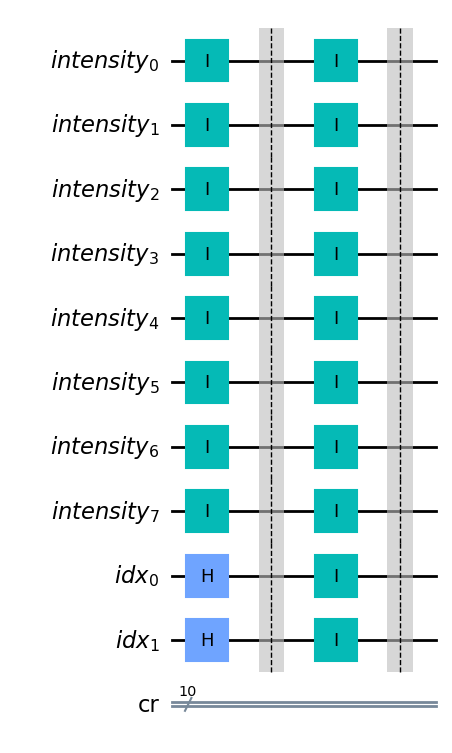

In [ ]:
# Encode the first pixel, since its value is 0, we will apply ID gates here:
for idx in range(num_qubits):
    qc_image.i(idx)

qc_image.barrier()
qc_image.draw('mpl')

Next, we will encode the second pixel (0,1) whose value is (01010101).

Here we will use a ControlNot gate with two-qubit controls (2-CNOT), where the Controls are triggered by the pixel position (Y,X), and the Targets rotate the
C^i_YX qubit which represents the pixel value.

Note here that because we want the CNOT gate to trigger when there the control is a combination of 0 and 1, that we wrap the qubit with X gates so it will trigger when the specified control is 0.

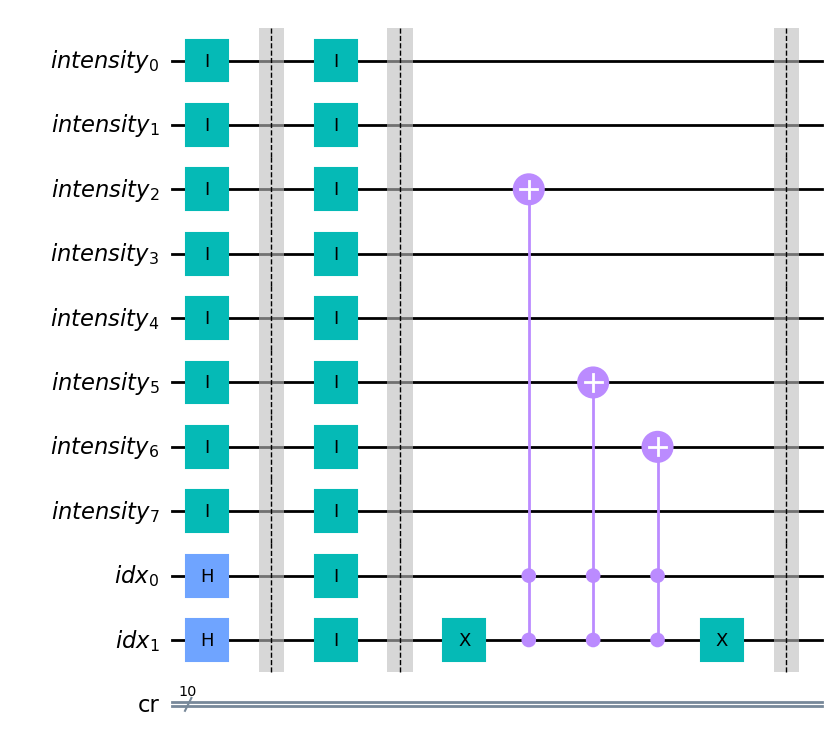

In [ ]:
# Encode the second pixel whose value is (01100100):
value01 = '01100100'

# Add the NOT gate to set the position at 01:
qc_image.x(qc_image.num_qubits-1)

# We'll reverse order the value so it is in the same order when measured.
for idx, px_value in enumerate(value01[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)

# Reset the NOT gate
qc_image.x(num_qubits-1)

qc_image.barrier()
qc_image.draw('mpl')

We'll now move on to encode the next pixel at position (1,0) with a value of (10101010).

In [ ]:
# Encode the third pixel whose value is (11001000):
value10 = '11001000'

# Add the 0CNOT gates, where 0 is on X pixel:
qc_image.x(num_qubits-2)
for idx, px_value in enumerate(value10[::-1]):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1, num_qubits-2, idx)
qc_image.x(num_qubits-2)


qc_image.barrier()
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                     »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘          »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │            »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐     »
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘»
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                     »
      cr: 10/════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ 
«intensity_0: ──────░─
«                   ░ 
«intensity_1: ──────░─
«                   ░ 
«intensity_2: ──────░─
«                   ░ 
«intensity_3: ──────░─
«                   ░ 
«intensity_4: ──────░─
«                   ░ 
«intensity_5: ──────░─
«                   ░ 
«intensity_6: ──────░─
«                   ░ 
«intensity_7: ──────░─
«             ┌───┐ ░ 
«      idx_0: ┤ X ├─░─
«             └───┘ ░ 
«      idx_1: ──────░─
«                   ░ 
«      cr: 10/════════
«

Finally, let's finish up encoding the last pixel position (1,1), with the value (11111111). This we simply do by adding Toffoli gates to all the pixel image values.

In [ ]:
# Encode the third pixel whose value is (11111111):
value11 = '11111111'

# Add the CCNOT gates:
for idx, px_value in enumerate(value11):
    if(px_value=='1'):
        qc_image.ccx(num_qubits-1,num_qubits-2, idx)

qc_image.barrier()
qc_image.measure(range(10),range(10))
qc_image.draw()

┌───┐ ░ ┌───┐ ░                           ░                     »
intensity_0: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░                           ░                     »
intensity_1: ┤ I ├─░─┤ I ├─░───────────────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      ┌───┐                ░                     »
intensity_2: ┤ I ├─░─┤ I ├─░──────┤ X ├────────────────░─────────────────────»
             ├───┤ ░ ├───┤ ░      └─┬─┘                ░      ┌───┐          »
intensity_3: ┤ I ├─░─┤ I ├─░────────┼──────────────────░──────┤ X ├──────────»
             ├───┤ ░ ├───┤ ░        │                  ░      └─┬─┘          »
intensity_4: ┤ I ├─░─┤ I ├─░────────┼──────────────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  ┌───┐           ░        │            »
intensity_5: ┤ I ├─░─┤ I ├─░────────┼──┤ X ├───────────░────────┼────────────»
             ├───┤ ░ ├───┤ ░        │  └─┬─┘┌───┐      ░        │  ┌───┐     »
intensity_6: ┤ I ├─░─┤ I ├─░────────┼────┼──┤ X ├──────░────────┼──┤ X ├─────»
             ├───┤ ░ ├───┤ ░        │    │  └─┬─┘      ░        │  └─┬─┘┌───┐»
intensity_7: ┤ I ├─░─┤ I ├─░────────┼────┼────┼────────░────────┼────┼──┤ X ├»
             ├───┤ ░ ├───┤ ░        │    │    │        ░ ┌───┐  │    │  └─┬─┘»
      idx_0: ┤ H ├─░─┤ I ├─░────────■────■────■────────░─┤ X ├──■────■────■──»
             ├───┤ ░ ├───┤ ░ ┌───┐  │    │    │  ┌───┐ ░ └───┘  │    │    │  »
      idx_1: ┤ H ├─░─┤ I ├─░─┤ X ├──■────■────■──┤ X ├─░────────■────■────■──»
             └───┘ ░ └───┘ ░ └───┘               └───┘ ░                     »
      cr: 10/════════════════════════════════════════════════════════════════»
                                                                             »
«                   ░ ┌───┐                                    ░ ┌─┐         »
«intensity_0: ──────░─┤ X ├────────────────────────────────────░─┤M├─────────»
«                   ░ └─┬─┘┌───┐                               ░ └╥┘┌─┐      »
«intensity_1: ──────░───┼──┤ X ├───────────────────────────────░──╫─┤M├──────»
«                   ░   │  └─┬─┘┌───┐                          ░  ║ └╥┘┌─┐   »
«intensity_2: ──────░───┼────┼──┤ X ├──────────────────────────░──╫──╫─┤M├───»
«                   ░   │    │  └─┬─┘┌───┐                     ░  ║  ║ └╥┘┌─┐»
«intensity_3: ──────░───┼────┼────┼──┤ X ├─────────────────────░──╫──╫──╫─┤M├»
«                   ░   │    │    │  └─┬─┘┌───┐                ░  ║  ║  ║ └╥┘»
«intensity_4: ──────░───┼────┼────┼────┼──┤ X ├────────────────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │  └─┬─┘┌───┐           ░  ║  ║  ║  ║ »
«intensity_5: ──────░───┼────┼────┼────┼────┼──┤ X ├───────────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │  └─┬─┘┌───┐      ░  ║  ║  ║  ║ »
«intensity_6: ──────░───┼────┼────┼────┼────┼────┼──┤ X ├──────░──╫──╫──╫──╫─»
«                   ░   │    │    │    │    │    │  └─┬─┘┌───┐ ░  ║  ║  ║  ║ »
«intensity_7: ──────░───┼────┼────┼────┼────┼────┼────┼──┤ X ├─░──╫──╫──╫──╫─»
«             ┌───┐ ░   │    │    │    │    │    │    │  └─┬─┘ ░  ║  ║  ║  ║ »
«      idx_0: ┤ X ├─░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫─»
«             └───┘ ░   │    │    │    │    │    │    │    │   ░  ║  ║  ║  ║ »
«      idx_1: ──────░───■────■────■────■────■────■────■────■───░──╫──╫──╫──╫─»
«                   ░                                          ░  ║  ║  ║  ║ »
«      cr: 10/════════════════════════════════════════════════════╩══╩══╩══╩═»
«                                                                 0  1  2  3 »
«                               
«intensity_0: ──────────────────
«                               
«intensity_1: ──────────────────
«                               
«intensity_2: ──────────────────
«                               
«intensity_3: ──────────────────
«             ┌─┐               
«intensity_4: ┤M├───────────────
«             └╥┘┌─┐            
«intensity_5: ─╫

Congratulations! You have successfully encoded a 2×2 pixel grayscale image! Now, let's take a moment to review what we have done and notice a few things.

#### Circuit Analysis

Now that we have encoded the image, let's analyze our circuit.

First, we'll take a look at the total number of gates we are using for this circuit.

We'll use the decompose function so we can strip the gates down to their basis gates.

We'll print out the depth, size, and operator counts:

In [ ]:
print('Circuit dimensions')
print('Circuit depth: ', qc_image.decompose().depth())
print('Circuit size: ', qc_image.decompose().size())

qc_image.decompose().count_ops()

Circuit dimensions
Circuit depth:  148
Circuit size:  244


OrderedDict([('cx', 84),
             ('t', 56),
             ('tdg', 42),
             ('h', 28),
             ('id', 18),
             ('measure', 10),
             ('barrier', 5),
             ('u3', 4),
             ('u2', 2)])

#####Decomposition of circuit
A few things here may be surprise you. First and most surprising is the circuit depth of ~150 (results will vary).

This compared to the depth of ~20 (without counting the measurement operations) you see drawn in the final circuit above.

The reason for this is due to the fact that the gates which we are using, particularly the multi-control gates, require decomposing into basis gates which can greatly increase depth.


#####Optimization of the circuit
Luckily for us Qiskit has various optimizers which help ensure that the circuit is constructed in such a way that minimizes the number of gates necessary to compose the multi-control gates[REF: PassManager].

The optimizers also ensure that the selected qubits are the most optimal based on connectivity between qubits and minimal error rates[REF:Optimization-Levels].

Having these optimizers saves us a lot of time from having to figuring those out ourselves!

#### Run on the Aer simulator

As with all near-term quantum computers, given the depth of the circuit we learned in the circuit analysis section and the number of 2-qubit gates necessary, it is expected to get extremely noisy and fairly useable data when running on a device with low Quantum Volume.

We'll keep this in mind when running our circuit and try to minimize the noise from our results when possible.

<ipython-input-40-ef603d1f8b29>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job_neqr = aer_sim.run(qobj)


Encoded: 00 = 0
Encoded: 01 = 01100100
Encoded: 10 = 11001000
Encoded: 11 = 1
{'1011001000': 2059, '1111111111': 2095, '0101100100': 2019, '0000000000': 2019}


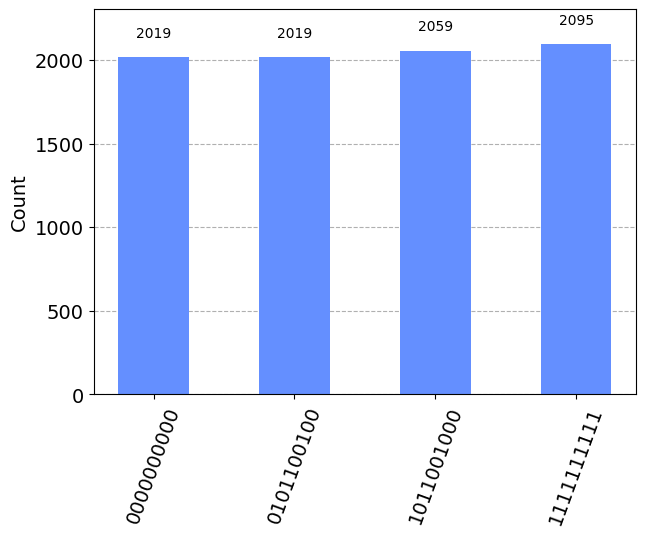

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc_image = transpile(qc_image, aer_sim)
qobj = assemble(t_qc_image, shots=8192)
job_neqr = aer_sim.run(qobj)
result_neqr = job_neqr.result()
counts_neqr = result_neqr.get_counts()
print('Encoded: 00 = 0')
print('Encoded: 01 = 01100100')
print('Encoded: 10 = 11001000')
print('Encoded: 11 = 1')

print(counts_neqr)
plot_histogram(counts_neqr)

**Results Analysis**

Observing the results above we can see the pixel positions are represented by the first two left-most bits (00,01,10,11) and the remaining bit values represent the 8-bit binary representation of the grayscale intensity values as listed in the encoded results as follows:


Encoded: 00 = 00000000, Encoded: 01 = 01100100, Encoded: 10 = 11001000, Encoded: 11 = 111111

#### Quantum Image Circuit Compression

As you can see, with a depth of 127 and a circuit size of 264, this is a very large and very deep quantum circuit!

Needless to say this is not very efficient.

There are of course ways to compress the image in a way to decrease the depth of the circuit and have fewer operators.

One way is to use a classic compression algorithm such as the Espresso Algorithm [8], which was developed in IBM by Brayton.

The Espresso algorithm is used to compress the control information of all the CNOT gates in the circuit to a minimum set of CNOT gates.

How this would work is that each group of gates per pixel is divided into two groups.

One which has the CNOT gates to represent the pixel values when set to 1, and the Identity gate which is set to 0. For example in the second pixel (0,1) we have 4 CNOT gates.

Each group  can be represented as follows:


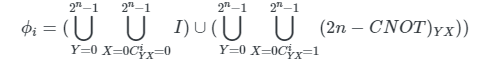

Where U represents the union of all position and color value representations of the two groups as follows:

The left group represents the Identity gate group, indicating that if the value C^i_YX = 0, then an Identity gate is to be used.

Since the Identity gates have no effect to the circuit, then the left side can be ignored.

The right group represents the controlled-not gate, indicating that if C^i_YX=1,  hen a CNOT gate is to be used.

The Espresso algorithm is then used to minimize the set of all the controlled-not gates, as illustrated in the equation below.

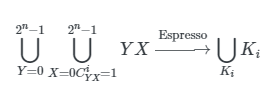

Where the U_K_i K_i represents the minimum number of controlled-not gates.

### Conclusion.

In this section we covered the Novel Enhanced Quantum Representation algorithm and how you can use controlled-not gates to present images on quantum system.

Also covered is a form to reduce the circuit depth of the quantum image representation by using the Espresso algorithm, which is used to minimize the number of controlled-gates to use in a quantum circuit and run on a quantum computer [7].

The potential advantages of representing images on a quantum system include ability to speed up any processing of the image such as quantum parallelism to search through an image [9], feature extraction [10], image segmentation [11].

There are various quantum machine learning algorithms that are integrated with many image processing operations such as; image classification [12], image recognition [13], and a variety of other image processing techniques [6].

Combining quantum image processing and quantum machine learning to potentially solve problems which may be challenging to classical systems, particularly those which require processing large volumes of images in various domains such as medical image processing, geographic information system imagery, and image restoration.
